In [275]:
import pandas as pd

In [276]:
import seaborn as sns
import xlrd
import random
import matplotlib.pyplot as plt
import geopandas as gpd
sns.set_style("whitegrid")

In [277]:

from shapely.geometry import Point

In [278]:
df = pd.read_csv("D:\\fightback\\data.csv",index_col=0)


In [279]:
df.head(10)

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,Physical Injury,25/03/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XJ99BF74EC,http://www.nepalpolice.gov.np/%E0%A4%9C%E0%A4%...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,Physical Injury,3/4/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IG49WH92XY,http://www.nepalpolice.gov.np/2013-05-02-10-32...,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,Physical Injury,1/5/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IS62NJ41RL,http://www.nepalpolice.gov.np/2013-05-07-10-39...,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,Physical Injury,7/5/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,Physical Injury,8/5/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LP22DS72LE,http://thehimalayantimes.com/fullNews.php?head...,Police on 16 May arrested a 43-year-old man of...,Opportunist,Attempted,Police,Physical Injury,16/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
MA88GP02AH,http://www.nepalpolice.gov.np/2013-06-09-10-53...,"Kamalesh Shah (15) of Sitamadi, India, current...",Child,Raped,Police,Physical Injury,5/6/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XT54XX52NQ,http://www.nepalpolice.gov.np/2013-06-19-11-52...,"The Metropolitan Police Circle, Kalimati, on 1...",Child,Raped,Police,Physical Injury,19/06/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LT42OQ97BA,http://www.nepalpolice.gov.np/2013-06-21-09-27...,Police on 21 June had arrested Shyam Lal Shres...,Child,Raped,Police,Physical Injury,21/06/2013,Kathmandu,"27.55752119624532, 85.0217998274353"


### Impact assesment: analysis of the "Consequences of the attack " column to understand the short and long term impacts on survivors of and their communities.This can hilight the need for support systems and rehabilitation services.

In [280]:
#consequences_df = df['Consequences of the attack'].str.get_dummies(', ')
#df["Consequences"] = df["Consequences of the attack"].astype("category").cat.codes
#consequences_df['Districts'] = df['Districts']
#df = pd.concat([df, consequences_df], axis=1)
#consequence_columns = ['Physical Injury', 'Murder', 'Pregnant']
#df['Total Consequences'] = df[consequence_columns].sum(axis=1)

In [281]:
df.head(20)

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,Physical Injury,25/03/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XJ99BF74EC,http://www.nepalpolice.gov.np/%E0%A4%9C%E0%A4%...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,Physical Injury,3/4/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IG49WH92XY,http://www.nepalpolice.gov.np/2013-05-02-10-32...,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,Physical Injury,1/5/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IS62NJ41RL,http://www.nepalpolice.gov.np/2013-05-07-10-39...,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,Physical Injury,7/5/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,Physical Injury,8/5/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LP22DS72LE,http://thehimalayantimes.com/fullNews.php?head...,Police on 16 May arrested a 43-year-old man of...,Opportunist,Attempted,Police,Physical Injury,16/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
MA88GP02AH,http://www.nepalpolice.gov.np/2013-06-09-10-53...,"Kamalesh Shah (15) of Sitamadi, India, current...",Child,Raped,Police,Physical Injury,5/6/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XT54XX52NQ,http://www.nepalpolice.gov.np/2013-06-19-11-52...,"The Metropolitan Police Circle, Kalimati, on 1...",Child,Raped,Police,Physical Injury,19/06/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LT42OQ97BA,http://www.nepalpolice.gov.np/2013-06-21-09-27...,Police on 21 June had arrested Shyam Lal Shres...,Child,Raped,Police,Physical Injury,21/06/2013,Kathmandu,"27.55752119624532, 85.0217998274353"


In [282]:
df['Districts']
df.head(70)
#consequences_df = df['Consequences of the attack'].str.get_dummies(', ')
#consequences_df['Districts'] = df['Districts']

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,Physical Injury,25/03/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XJ99BF74EC,http://www.nepalpolice.gov.np/%E0%A4%9C%E0%A4%...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,Physical Injury,3/4/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IG49WH92XY,http://www.nepalpolice.gov.np/2013-05-02-10-32...,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,Physical Injury,1/5/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IS62NJ41RL,http://www.nepalpolice.gov.np/2013-05-07-10-39...,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,Physical Injury,7/5/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,Physical Injury,8/5/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
...,...,...,...,...,...,...,...,...,...
VR48XK39HE,http://www.nepalpolice.gov.np/2014-07-18-08-57...,"Police had arrested Suresh Bhatta (24), Deepak...",Gang,Raped,Police,Physical Injury,17/07/2014,Kanchanpur,"28.839299762331823, 80.32165271565319"
DB70JU37ZS,http://www.myrepublica.com/portal/index.php?ac...,"Police have arrested Dhan Bahadur Gurung, 23,...",Child,Raped,Police,Physical Injury,21/07/2014,Gorkha,"28.839299762331823, 80.32165271565319"
UZ07GT27QX,http://www.nepalpolice.gov.np/2014-07-23-10-52...,A person was arrested on charge of raping a 10...,Child,Raped,Victim Mother,Physical Injury,22/07/2014,Kathmandu,"28.2992196143429, 84.85610534181566"


In [283]:
#df.head()

In [284]:
consequences_counts = df['Consequences of the attack'].value_counts()


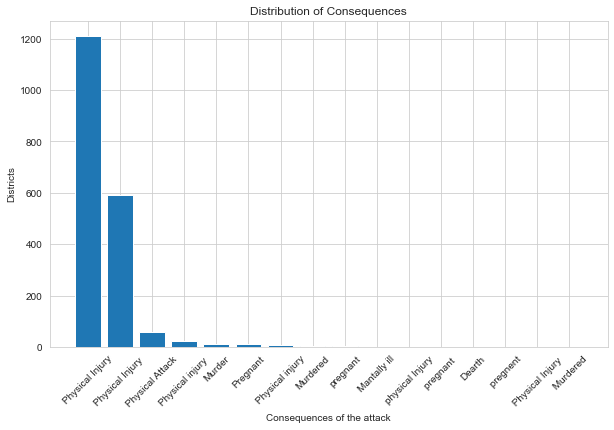

In [285]:
plt.figure(figsize=(10, 6))
plt.bar(consequences_counts.index, consequences_counts.values)
plt.xlabel('Consequences of the attack')
plt.ylabel('Districts')
plt.title('Distribution of Consequences')
plt.xticks(rotation=45)
plt.show()

In [286]:
df["Consequences of the attack"].unique()

array(['Physical Injury ', 'Physical injury ', 'Physical injury',
       'Mantally ill', 'Murder', 'Physical Injury', 'Pregnant',
       'physical Injury', 'pregnant ', 'Dearth', 'Murdered',
       'Physical Attack', ' pregnent', nan, ' Physical Injury ',
       ' Murdered', 'pregnant'], dtype=object)

In [287]:
df["Consequences of the attack"]=df["Consequences of the attack"].str.lower()
df["Consequences of the attack"]=df["Consequences of the attack"].str.strip()
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("murdered","murder")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("physical attack","physical Injury")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("pregnent","pregnant")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("dearth","death")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("mantally ill","Mentally ill")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("physical injury","physical Injury")

In [288]:
df["Consequences of the attack"].unique()

array(['physical Injury', 'Mentally ill', 'murder', 'pregnant', 'death',
       nan], dtype=object)

In [289]:
df["Districts"].unique()

array(['Kathmandu', 'Siraha', 'Jhapa', 'Rautahat', 'Mahottari', 'sunsari',
       'Rupandehi', 'Morang', 'Sindhupalchowk', 'Khotang', 'Rukum',
       'Palpa', 'Lamjung', 'Gulmi', 'Kaverepalanchowk', 'Kaski', 'Banke',
       'Kavrepalanchock', 'Bara', 'Bhaktapur', 'Pyuthan',
       'Kaverepalanchok', 'Sarlahi', 'Bhojpur', 'Sunsari', 'Terhathum',
       'Dang', 'Syangja', 'Kailali', 'Kanchanpur', 'Gorkha', 'Dadeldhura',
       'Dhanusa', 'Kavrepalanchok', 'Panchthar', 'Sindhuli', 'Tanahu',
       'Udayapur', 'Makwanpur', 'Ilam', 'Rasuwa', 'Kapilvastu', 'Baglung',
       'Bardiya', 'Sindhupalchok', 'Jajarkot', 'Lalitpur', 'Dailekh',
       'Myagdi', 'Arghakhanchi', 'Taplejung', 'Dolakha', 'Nawalparasi',
       'Darchula', 'Salyan', 'Surkhet', 'Parsa', 'Parbat', 'Saptari',
       'Panchathar', 'Kalikot', 'Dhanusha', 'Chitwan', 'Mohattari',
       'Baitadi', 'Bajura', 'Nuwakot', 'Bajhang', 'Sunsary', 'Jumla',
       'Solukhumbu', 'Mugu', 'Dhading', 'Nawalparasi West',
       'Western Rukum'

In [300]:
df["Districts"]=df["Districts"].str.lower()
df["Districts"]=df["Districts"].str.strip()
df["Districts"]=df["Districts"].str.replace("kaverepalanchowk","kavrepalanchok")
df["Districts"]=df["Districts"].str.replace("sunsari","sunsari")
df["Districts"]=df["Districts"].str.replace("sunsary","sunsari")
df["Districts"]=df["Districts"].str.replace("rupendhi","rupandehi")
df["Districts"]=df["Districts"].str.replace("terahathum","terhathum")
df["Districts"]=df["Districts"].str.replace("solukhubmu","solukhumbu")
df["Districts"]=df["Districts"].str.replace("tehrathum","terhathum")
df["Districts"]=df["Districts"].str.replace("terathum","terhathum")
df["Districts"]=df["Districts"].str.replace("rupandahi","rupandehi")
df["Districts"]=df["Districts"].str.replace("rupandhi","rupandehi")
df["Districts"]=df["Districts"].str.replace("sindupalchok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindupalchowk","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhupalachok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhhupalchok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhupalchok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhupalchwok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhuplchwok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhuplchowk","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("mohattari","mahottari")
df["Districts"]=df["Districts"].str.replace("ruoendehi","rupandehi")
df["Districts"]=df["Districts"].str.replace("rupendehi","rupandehi")
df["Districts"]=df["Districts"].str.replace("rukum west","rukum West")
df["Districts"]=df["Districts"].str.replace("western rukum","rukum West")
#df["Districts"]=df["Districts"].str.replace("rukum (west)","Rukum West")
df["Districts"]=df["Districts"].str.replace("kabhrepalanchok","kavrepalanchok")
df["Districts"]=df["Districts"].str.replace("kavrepalanchock","kavrepalanchok")
df["Districts"]=df["Districts"].str.replace("kaverepalanchok","kavrepalanchok")
df["Districts"]=df["Districts"].str.replace("bhojur","bhojpur")
df["Districts"]=df["Districts"].str.replace("sayangja","syangja")
df["Districts"]=df["Districts"].str.replace("sayanja","syangja")
df["Districts"]=df["Districts"].str.replace("panchathar","panchthar")
df["Districts"]=df["Districts"].str.replace("pachthar","panchthar")
df["Districts"]=df["Districts"].str.replace("tanahun","tanahu")
df["Districts"]=df["Districts"].str.replace("tahanu","tanahu")
df["Districts"]=df["Districts"].str.replace("udhayapur","udayapur")
df["Districts"]=df["Districts"].str.replace("udaypur","udayapur")
df["Districts"]=df["Districts"].str.replace("udaipur","udayapur")
df["Districts"]=df["Districts"].str.replace("ilam","illam")
df["Districts"]=df["Districts"].str.replace("ilam","illam")
df["Districts"]=df["Districts"].str.replace("kapilbastu","kapilvastu")
df["Districts"]=df["Districts"].str.replace("bardia","bardiya")
df["Districts"]=df["Districts"].str.replace("dailekh","dailekh")
df["Districts"]=df["Districts"].str.replace("taplegunj","taplejung")
df["Districts"]=df["Districts"].str.replace("myagdi","Myagdi")
df["Districts"]=df["Districts"].str.replace("dolkha","dolakha")
df["Districts"]=df["Districts"].str.replace("nawalparasi west","Nawalparasi West")
df["Districts"]=df["Districts"].str.replace("nawaparasi west","Nawalparasi West")
df["Districts"]=df["Districts"].str.replace("nawalparasi east","Nawalparsi East")
df["Districts"]=df["Districts"].str.replace("parsa","Parsa")
df["Districts"]=df["Districts"].str.replace("sapatari","saptari")
df["Districts"]=df["Districts"].str.replace("parbat","Parbat")
df["Districts"]=df["Districts"].str.replace("chitawan","chitwan")
df["Districts"]=df["Districts"].str.replace("solukhumbhu","solukhumbu")
df["Districts"]=df["Districts"].str.replace("solukhubmu","solukhumbu")
df["Districts"]=df["Districts"].str.replace("'karnali","karnali")
df["Districts"]=df["Districts"].str.replace("'gandaki","gandaki")
#df["Districts"]=df["Districts"].str.replace("bara'","bara")
df["Districts"]=df["Districts"].str.replace("shankhuwasabha","sankhuwasabha")
df["Districts"] = df["Districts"].str.replace("bara'", "bara", regex=True)

In [301]:
df["Districts"].unique()

array(['kathmandu', 'siraha', 'jhapa', 'rautahat', 'mahottari', 'sunsari',
       'rupandehi', 'morang', 'sindhupalchowk', 'khotang', 'rukum',
       'palpa', 'lamjung', 'gulmi', 'kavrepalanchok', 'kaski', 'banke',
       'bara', 'bhaktapur', 'pyuthan', 'sarlahi', 'bhojpur', 'terhathum',
       'dang', 'syangja', 'kailali', 'kanchanpur', 'gorkha', 'dadeldhura',
       'dhanusa', 'panchthar', 'sindhuli', 'tanahu', 'udayapur',
       'makwanpur', 'illam', 'rasuwa', 'kapilvastu', 'baglung', 'bardiya',
       'jajarkot', 'lalitpur', 'dailekh', 'Myagdi', 'arghakhanchi',
       'taplejung', 'dolakha', 'nawalparasi', 'darchula', 'salyan',
       'surkhet', 'Parsa', 'Parbat', 'saptari', 'kalikot', 'dhanusha',
       'chitwan', 'baitadi', 'bajura', 'nuwakot', 'bajhang', 'jumla',
       'solukhumbu', 'mugu', 'dhading', 'Nawalparasi West', 'rukum West',
       'rukum east', 'birgunj', 'kavre', 'dhankuta', 'nawalparsi east',
       'doti', 'achham', 'hetauda', 'okhaldhunga', 'madi', 'ramechhap',
 

AttributeError: 'float' object has no attribute 'replace'

In [247]:
desired_consequences = ['physical injury','mentally ill','murder', 'pregnant','death']
filtered_df = df[df['Consequences of the attack'].isin(desired_consequences)]


In [189]:
#g = sns.FacetGrid(filtered_df, col='Consequences of the attack', height=5, aspect=1.2)

In [190]:
consequences_by_district = filtered_df.groupby(['Districts', 'Consequences of the attack']).size().reset_index(name='count')

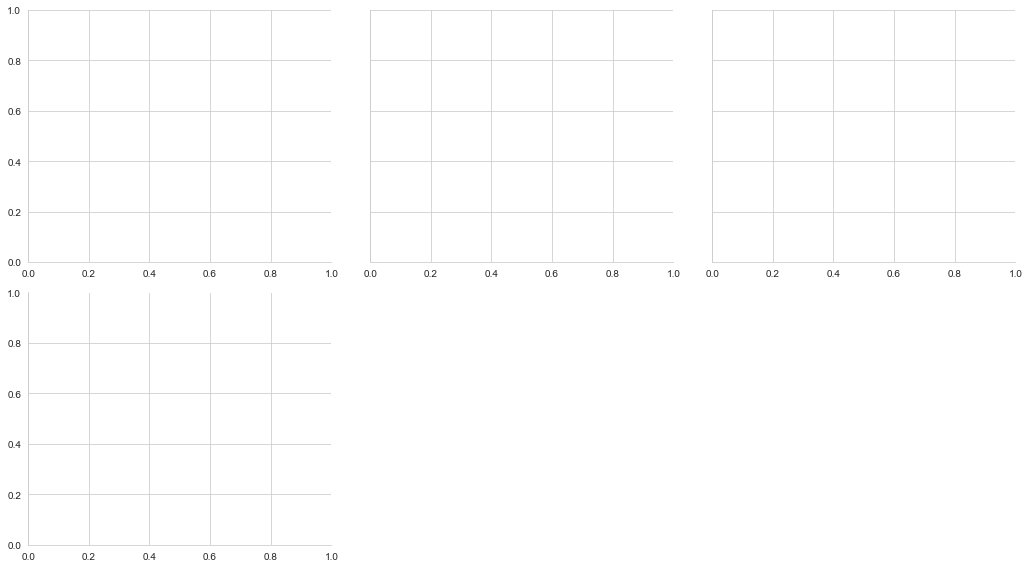

In [192]:
#g = sns.FacetGrid(consequences_by_district, col='Consequences of the attack', height=5, aspect=1.2)
g = sns.FacetGrid(consequences_by_district, col='Consequences of the attack', col_wrap=3, height=4, aspect=1.2, sharex=False)

In [193]:
g.map(sns.barplot, 'Districts','count', order=consequences_by_district['Districts'].unique())
g.set_xticklabels(rotation=90)

In [194]:

g.set_axis_labels('Districts','Count')
g.fig.suptitle('Consequences by District', y=1.02)

Text(0.5, 1.02, 'Consequences by District')

In [195]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>